***Import library***

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from math import e
import re
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn import set_config
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_selection import VarianceThreshold



1.   Importing data



In [ ]:
# Connect with GGDRIVE
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Path to file CSV in Google Drive
file_path = '/content/drive/My Drive/horse.csv'

# Read data DataFrame
df = pd.read_csv(file_path)



**Data overview**

In [ ]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [ ]:
df.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [ ]:
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

We see that there are 28 columns in the dataframe and some columns like 'rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities' 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein', 'abdomo_appearance', 'abdomo_protein' have null values.

In [ ]:
# Creating a copy of dataframe

df1 = df.copy()

First of all we will try to understand the meaning of all columns of the dataframe.
For this we will see the unique values attained by each column whose meaning we are unable to understand.

In [ ]:
# Categorical data analysis:
for col in df1.select_dtypes(include='object').columns:
    print(f"Unique values for {col}:", df[col].unique())

Unique values for surgery: ['no' 'yes']
Unique values for age: ['adult' 'young']
Unique values for temp_of_extremities: ['cool' nan 'normal' 'cold' 'warm']
Unique values for peripheral_pulse: ['reduced' nan 'normal' 'absent' 'increased']
Unique values for mucous_membrane: [nan 'pale_cyanotic' 'pale_pink' 'dark_cyanotic' 'normal_pink'
 'bright_red' 'bright_pink']
Unique values for capillary_refill_time: ['more_3_sec' 'less_3_sec' nan '3']
Unique values for pain: ['extreme_pain' 'mild_pain' 'depressed' nan 'severe_pain' 'alert']
Unique values for peristalsis: ['absent' 'hypomotile' nan 'hypermotile' 'normal']
Unique values for abdominal_distention: ['severe' 'slight' 'none' nan 'moderate']
Unique values for nasogastric_tube: [nan 'none' 'slight' 'significant']
Unique values for nasogastric_reflux: [nan 'less_1_liter' 'none' 'more_1_liter']
Unique values for rectal_exam_feces: ['decreased' 'absent' 'normal' nan 'increased']
Unique values for abdomen: ['distend_large' 'other' 'normal' nan 

In [ ]:
# Numerical data analysis:
for col in df1.select_dtypes(include='number').columns:
    print(f"Distribution of {col}:", df[col].describe())
    print('')

Distribution of hospital_number: count    2.990000e+02
mean     1.087733e+06
std      1.532032e+06
min      5.184760e+05
25%      5.289040e+05
50%      5.303010e+05
75%      5.347360e+05
max      5.305629e+06
Name: hospital_number, dtype: float64

Distribution of rectal_temp: count    239.000000
mean      38.168619
std        0.733744
min       35.400000
25%       37.800000
50%       38.200000
75%       38.500000
max       40.800000
Name: rectal_temp, dtype: float64

Distribution of pulse: count    275.000000
mean      72.000000
std       28.646219
min       30.000000
25%       48.000000
50%       64.000000
75%       88.000000
max      184.000000
Name: pulse, dtype: float64

Distribution of respiratory_rate: count    241.000000
mean      30.460581
std       17.666102
min        8.000000
25%       18.000000
50%       25.000000
75%       36.000000
max       96.000000
Name: respiratory_rate, dtype: float64

Distribution of nasogastric_reflux_ph: count    53.000000
mean      4.707547
std  

In [ ]:
# Numerical data analysis:
for col in df1.select_dtypes(include='number').columns:
    print(f"Distribution of {col}:", df[col].unique())
    print('')

Distribution of hospital_number: [ 530101  534817  530334 5290409  530255  528355  526802  529607  530051
 5299629  528548  527927  528031 5291329  534917  530233 5301219  526639
 5290481  532110  530157  529340  521681  534998  533692  529518  530526
  528653 5279442  535415  529475  530242  529427  529663  529796  528812
  529493  533847  528996 5277409  529498 5288249  530301  534069  535407
  529827  529888  529821  528890  529642  529766  527706  529483  530544
  529461 5282839  528872  529640  528298  528904  530438  527957  528630
  534293  529667  534885  534784  528931  529777  530276  528214  529424
 5299253  528469 5292929  534092  534615  534753  530693  527463  527518
  534756 5290759 5279822  529849  529304  529388  528006  529703  535381
  534197  530251  530310  528729  535158  530319  534145  534135  530002
  535364  534899  534938 5292489  527563  530381  528668  529764  533696
 5297379  527544  533736  534963  527933  532349  533723  535208 5290482
  533983  535166  

### <b> Cleaning data </b>

Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps: \
1) Remove duplicate rows  \
2) Handling missing values.  \
3) Convert columns to appropriate datatypes.  \
4) Adding important columns

### <b> Step 1: Removing duplicate rows if any </b>

In [ ]:
df1[df1.duplicated()].shape   # Show no. of rows of duplicate rows duplicate rows

(0, 28)

In [ ]:
# Dropping duplicate values
df1.drop_duplicates(inplace = True)

In [ ]:
df1.shape

(299, 28)

### <b> Step2: Handling missing values. </b>

In [ ]:
# Columns having missing values.
df1.isnull().sum().sort_values(ascending = False)[:10]

nasogastric_reflux_ph    246
abdomo_protein           198
abdomo_appearance        165
abdomen                  118
nasogastric_reflux       106
nasogastric_tube         104
rectal_exam_feces        102
peripheral_pulse          69
rectal_temp               60
respiratory_rate          58
dtype: int64

                                 column_name  percent_missing data_type
nasogastric_reflux_ph  nasogastric_reflux_ph        82.274247   float64
abdomo_protein                abdomo_protein        66.220736   float64
abdomo_appearance          abdomo_appearance        55.183946    object
abdomen                              abdomen        39.464883    object
nasogastric_reflux        nasogastric_reflux        35.451505    object
nasogastric_tube            nasogastric_tube        34.782609    object
rectal_exam_feces          rectal_exam_feces        34.113712    object
peripheral_pulse            peripheral_pulse        23.076923    object
rectal_temp                      rectal_temp        20.066890   float64
respiratory_rate            respiratory_rate        19.397993   float64
temp_of_extremities      temp_of_extremities        18.729097    object
abdominal_distention    abdominal_distention        18.729097    object
pain                                    pain        18.394649   

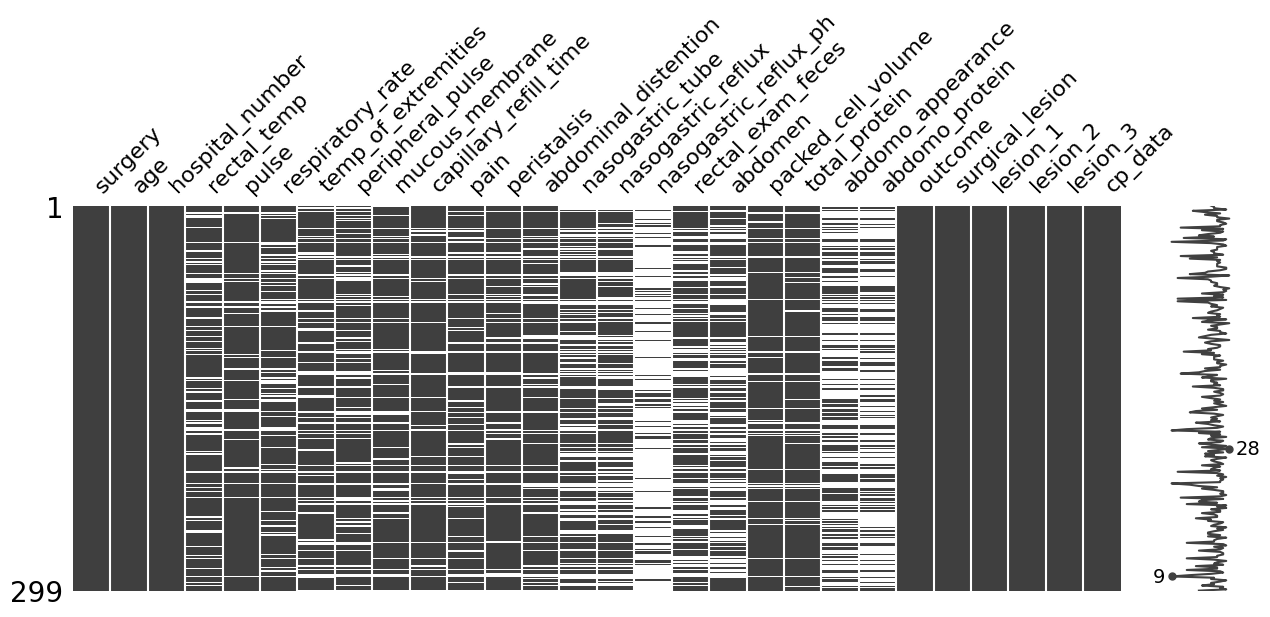

In [ ]:
# Counting the missing data per column as a percentage of the total rows.
percent_missing = df1.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing,'data_type':df1.dtypes})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)

print(missing_value_df)

%matplotlib inline
plt.close('all')
msno.matrix(df, figsize=(15,5));

The data analysis revealed that the columns 'lesion_2' and 'lesion_3' do not provide much information and will be deleted. The column 'hospital_number' will also be deleted as it is not relevant for the analysis.

Some columns, such as 'nasogastric_reflux_ph' and 'abdomo_protein', have more than 50% missing data. Columns with more than 80% missing data will be deleted.

In [ ]:
# Handling Missing Values

df1 = df1.drop(columns=['lesion_1', 'lesion_2', 'lesion_3', 'hospital_number', 'nasogastric_reflux_ph', 'abdomo_appearance', 'abdomo_protein'])
df1

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,cp_data
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,...,severe,NaN,NaN,decreased,distend_large,45.0,8.4,died,no,no
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,...,slight,NaN,NaN,absent,other,50.0,85.0,euthanized,no,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,...,none,NaN,NaN,normal,normal,33.0,6.7,lived,no,yes
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,...,severe,none,less_1_liter,decreased,NaN,48.0,7.2,died,yes,yes
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,...,NaN,NaN,NaN,NaN,NaN,74.0,7.4,died,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,...,NaN,NaN,NaN,NaN,distend_large,55.0,65.0,euthanized,no,no
295,no,adult,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,...,moderate,significant,none,absent,distend_small,44.0,NaN,euthanized,yes,yes
296,yes,adult,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,...,moderate,slight,none,decreased,distend_large,60.0,6.8,died,yes,no
297,yes,adult,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,...,moderate,significant,none,absent,distend_small,50.0,6.0,lived,yes,yes


In [ ]:
df1.shape

(299, 21)

Since, Fill missing values ​​with mode values ​​for objects columns

In [ ]:
object_cols = [
    "surgery", "age", "temp_of_extremities", "peripheral_pulse",
    "mucous_membrane", "capillary_refill_time", "pain", "peristalsis",
    "abdominal_distention", "nasogastric_tube", "nasogastric_reflux",
    "rectal_exam_feces", "abdomen", "outcome",
    "surgical_lesion", "cp_data"
]
df1[object_cols] = df1[object_cols].apply(lambda x: x.fillna(x.mode()[0]))

Next, Fill in missing values ​​with the average value for arithmetic columns

In [ ]:
numeric_mean_cols = [
    "rectal_temp", "pulse", "respiratory_rate",
    "packed_cell_volume", "total_protein"
]
df1[numeric_mean_cols] = df1[numeric_mean_cols].fillna(df1[numeric_mean_cols].mean())

In [ ]:
# Checking if all null values are removed
df1.isnull().sum().sort_values(ascending = False)[:6]

surgery                 0
abdominal_distention    0
surgical_lesion         0
outcome                 0
total_protein           0
packed_cell_volume      0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   rectal_temp            299 non-null    float64
 3   pulse                  299 non-null    float64
 4   respiratory_rate       299 non-null    float64
 5   temp_of_extremities    299 non-null    object 
 6   peripheral_pulse       299 non-null    object 
 7   mucous_membrane        299 non-null    object 
 8   capillary_refill_time  299 non-null    object 
 9   pain                   299 non-null    object 
 10  peristalsis            299 non-null    object 
 11  abdominal_distention   299 non-null    object 
 12  nasogastric_tube       299 non-null    object 
 13  nasogastric_reflux     299 non-null    object 
 14  rectal_exam_feces      299 non-null    object 
 15  abdome

**1.   EDA**

Let's first find correlations between numerical data.

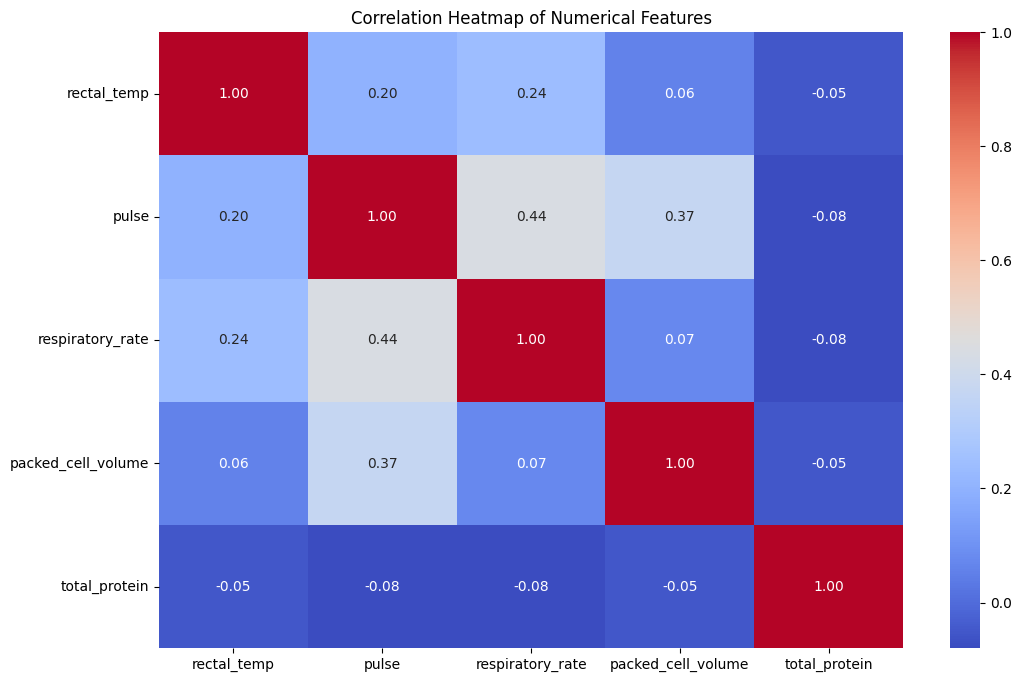

In [ ]:
# Create heatmap for correlation between arithmetic variables
plt.figure(figsize=(12, 8))
sns.heatmap(df1[['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

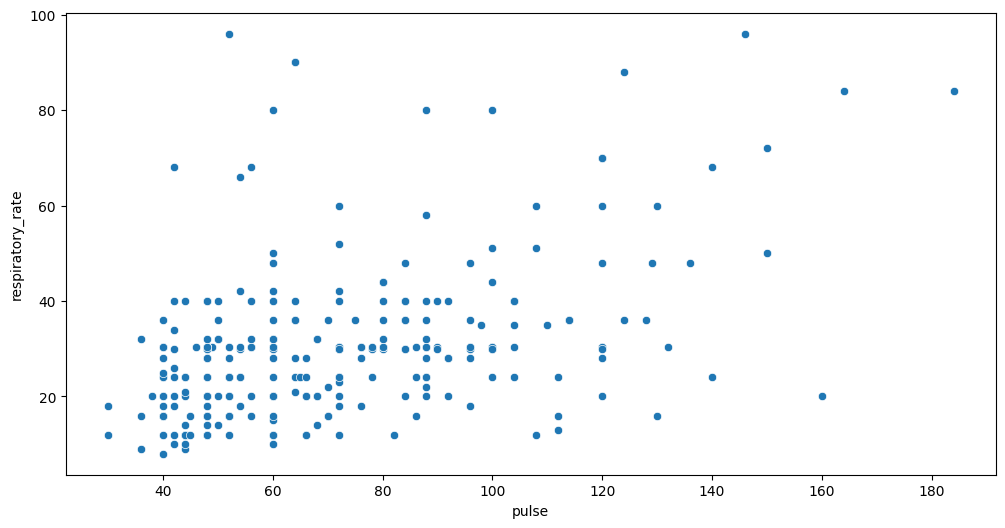

In [ ]:
# Create a pairplot to view the distribution and pairwise correlations between numeric variables
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'respiratory_rate', x = 'pulse', data = df1)
plt.show()

We notice that there is an outlier in pulse and respiratory_rate, so we will remove that for better scatter plot

In [ ]:
df1.drop(df1[df1['pulse'] > 180].index, inplace = True)

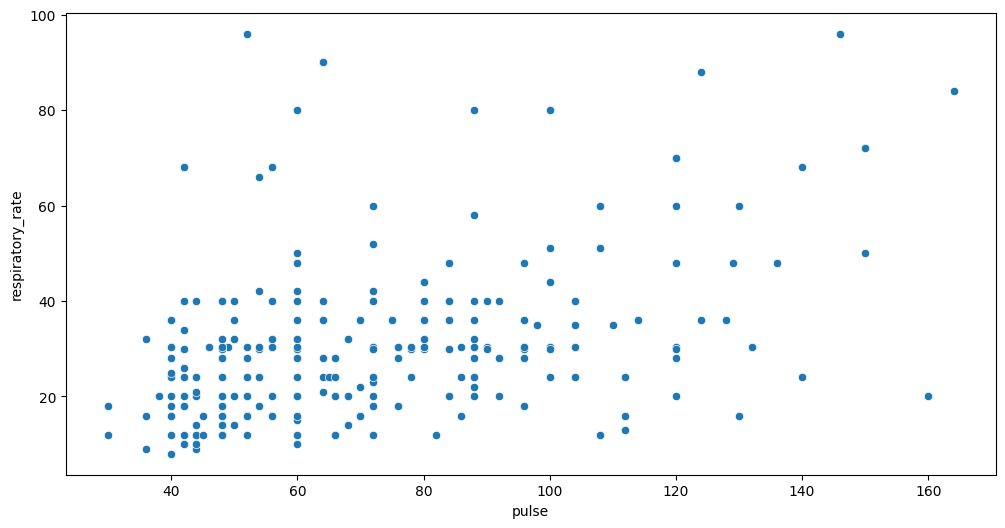

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'respiratory_rate', x = 'pulse', data = df1)
plt.show()

## Univariate Analysis

Q1) What is the highest respiratory_rate?

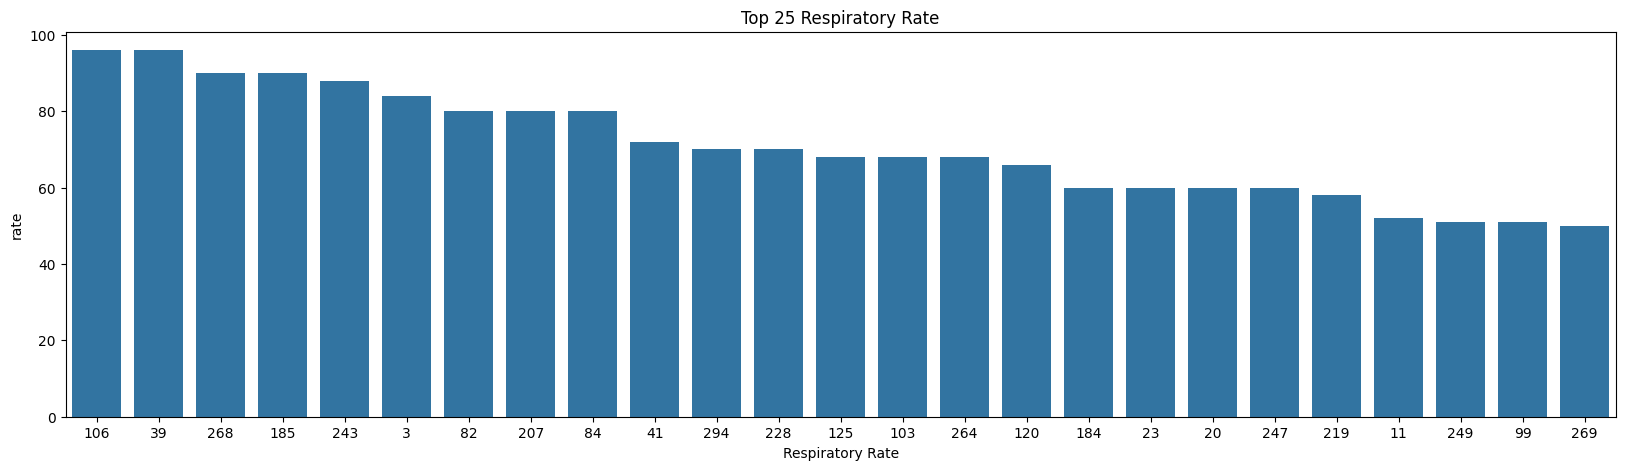

In [ ]:
d1 = pd.DataFrame(df1['respiratory_rate']).reset_index().rename(columns={'index': 'respiratory_rate', 'respiratory_rate': 'rate'}).sort_values(by='rate', ascending=False)
d1 = d1[:25]  # Top 25 the highest rectal

plt.figure(figsize=(20, 5))
sns.barplot(x='respiratory_rate', y='rate', data=d1, order=d1.sort_values('rate', ascending=False).respiratory_rate)
plt.xlabel('Respiratory Rate')
plt.title('Top 25 Respiratory Rate')
plt.show()

Q2) Which pain does have highest Respiratory Rate and which pain does have highest pulse?

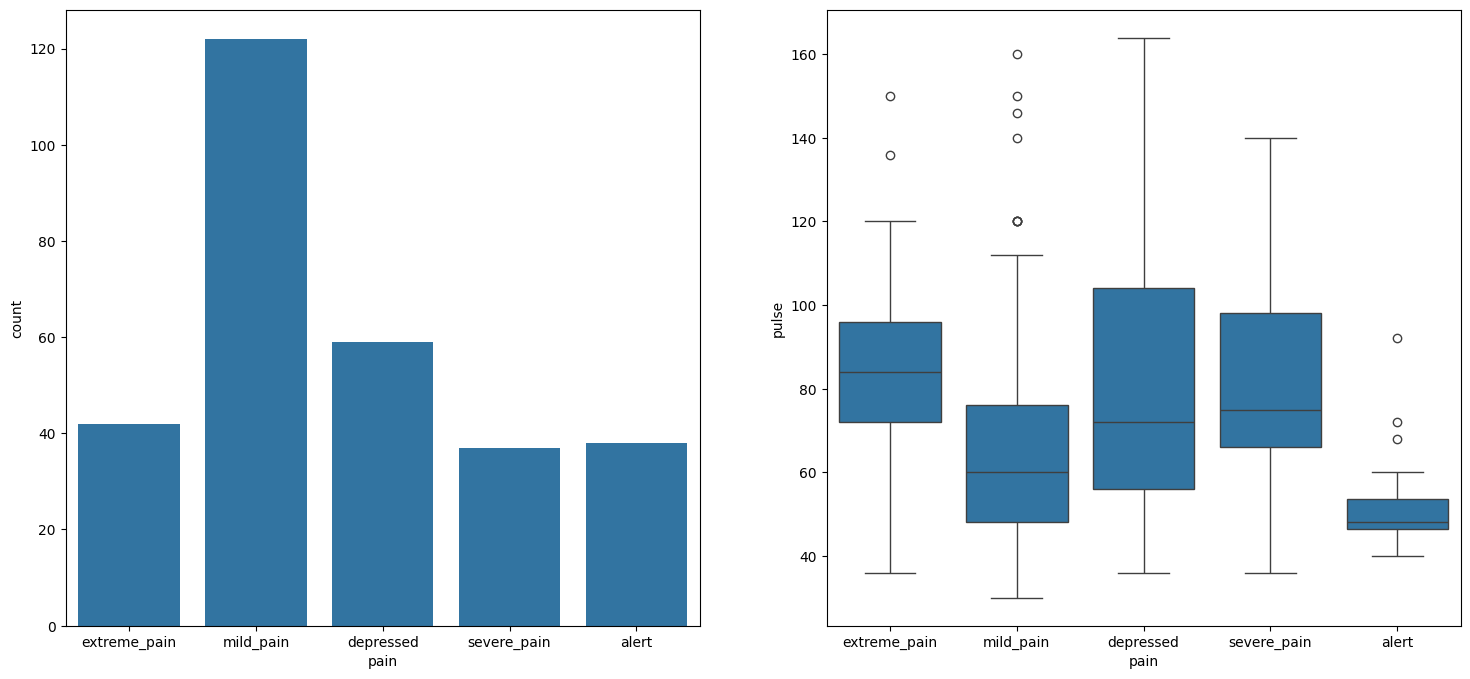

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = df1.groupby('pain')
d1['rate'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df1['pain'])
sns.boxplot(ax = axes[1], x = df1['pain'], y = df1['pulse'])
plt.show()


Q3) Which mucous_membrane type is most of horse?

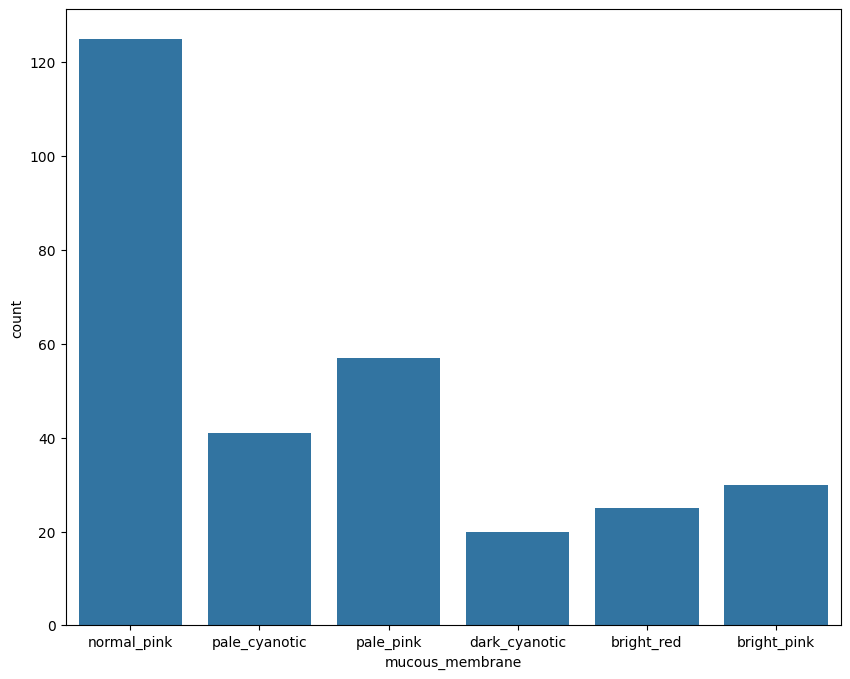

In [ ]:
plt.figure( figsize=(10, 8))

sns.countplot(x = df1['mucous_membrane'])
plt.show()

## <b> (1) Age wise analysis </b>

Q1) What is percentage of age have colic?

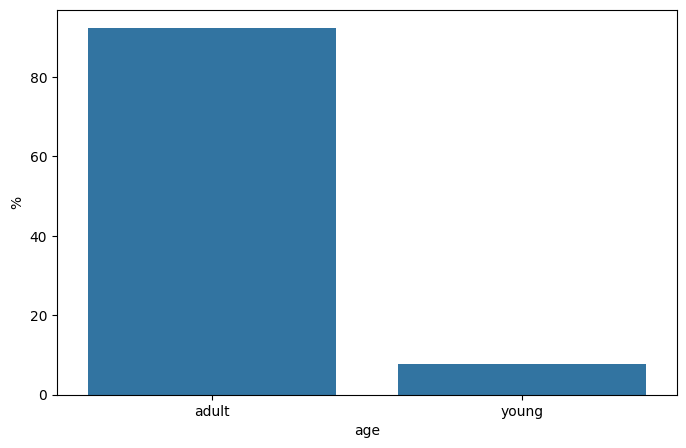

In [ ]:
grouped_by_age = df1.groupby('age')
d1 = pd.DataFrame((grouped_by_age.size()/df1.shape[0])*100).reset_index().rename(columns = {0:'%'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['age'], y = d1['%'] )
plt.show()

Q2) Which age is more likely to have surgery?

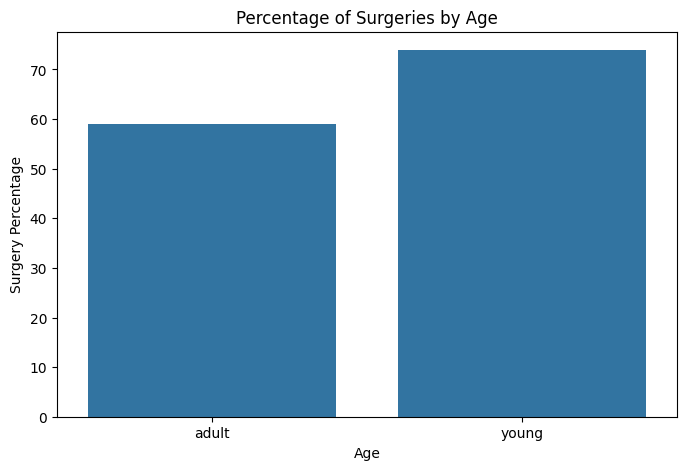

In [ ]:
grouped_by_age_surgery = df1.groupby(['age', 'surgery']).size().unstack()

grouped_by_age_surgery['Surgery_Percentage'] = (grouped_by_age_surgery['yes'] / grouped_by_age_surgery.sum(axis=1)) * 100

d3 = grouped_by_age_surgery.reset_index()[['age', 'Surgery_Percentage']]

plt.figure(figsize=(8, 5))
sns.barplot(x='age', y='Surgery_Percentage', data=d3)
plt.xlabel('Age')
plt.ylabel('Surgery Percentage')
plt.title('Percentage of Surgeries by Age')
plt.show()

Q3) Which age has better abdomen??

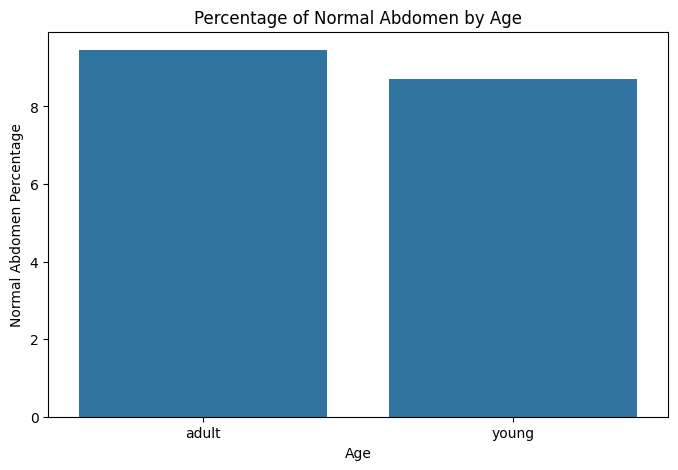

In [ ]:
grouped_by_age_abdomen = df1.groupby(['age', 'abdomen']).size().unstack()

grouped_by_age_abdomen['Normal_Percentage'] = (grouped_by_age_abdomen['normal'] / grouped_by_age_abdomen.sum(axis=1)) * 100

d2 = grouped_by_age_abdomen.reset_index()[['age', 'Normal_Percentage']]

plt.figure(figsize=(8, 5))
sns.barplot(x='age', y='Normal_Percentage', data=d2)
plt.xlabel('Age')
plt.ylabel('Normal Abdomen Percentage')
plt.title('Percentage of Normal Abdomen by Age')
plt.show()

Q4) Which age has higher live?

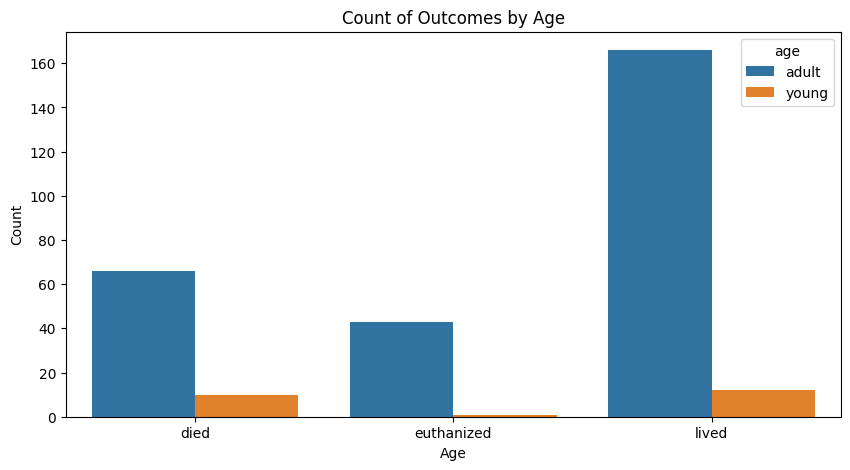

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='outcome', hue='age', data=df1)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Outcomes by Age')
plt.show()

## <b> (2) Pain wise Analysis </b>

Q1) Which is the most common pain for horse?

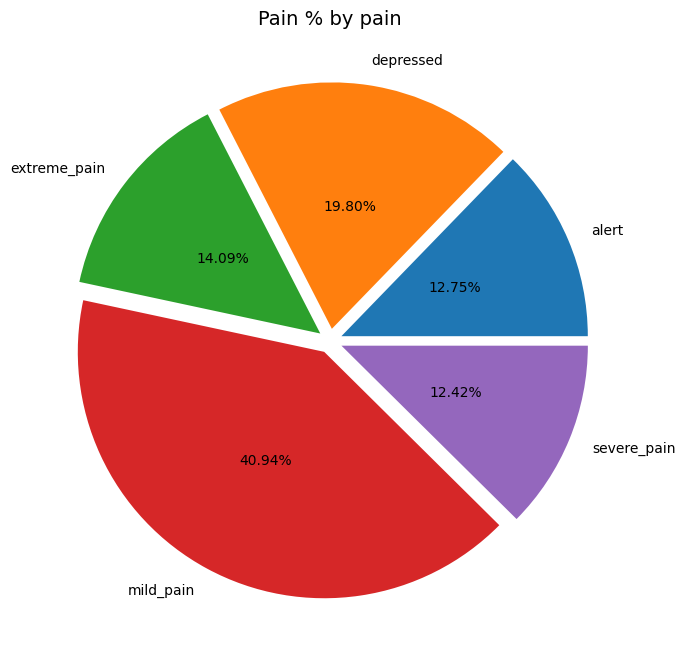

In [ ]:
group_by_pain = df1.groupby('pain')
d1 = pd.DataFrame(round((group_by_pain.size()/df1.shape[0])*100,2)).reset_index().rename(columns = {0: 'Pain_%'})
plt.figure(figsize = (8,8))
data = d1['Pain_%']
labels = d1['pain']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Pain % by pain", fontsize=14);

Q2) Which pain has the highest heart rate?

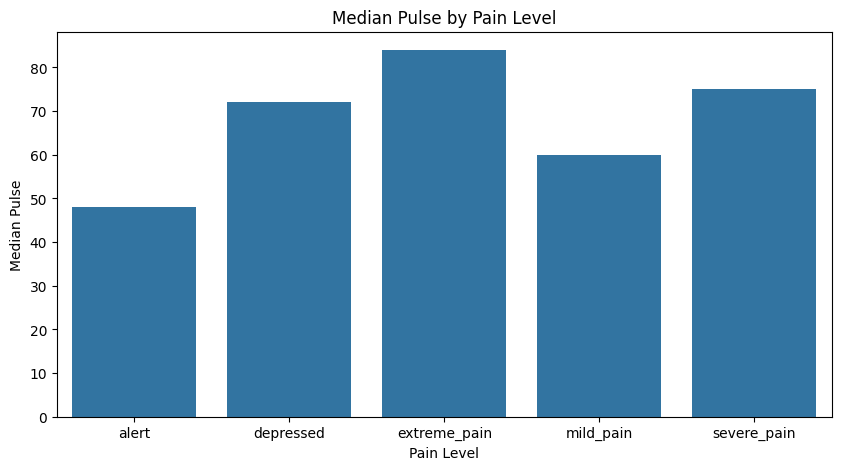

In [ ]:
group_by_pain = df1.groupby('pain')
d2 = pd.DataFrame(round(group_by_pain['pulse'].median(), 2)).reset_index().rename(columns={'pulse': 'median_pulse'})

plt.figure(figsize=(10, 5))
sns.barplot(x='pain', y='median_pulse', data=d2)
plt.xlabel('Pain Level')
plt.ylabel('Median Pulse')
plt.title('Median Pulse by Pain Level')
plt.show()

Q3) Which pain depend on each age?

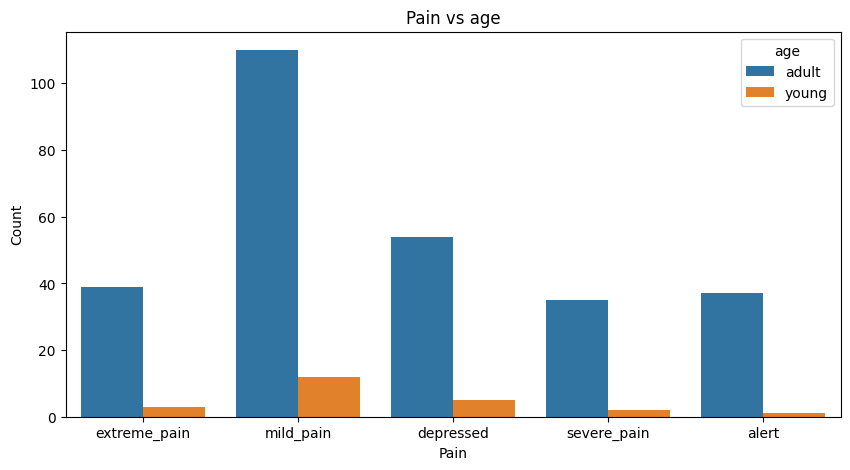

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='pain', hue='age', data=df1)
plt.xlabel('Pain')
plt.ylabel('Count')
plt.title('Pain vs age')
plt.show()

Q3) Which pain has the highest lived rate?

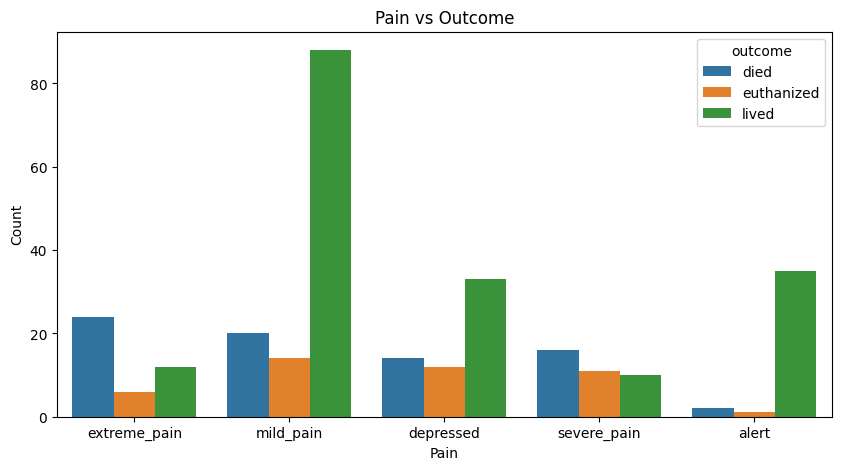

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='pain', hue='outcome', data=df1)
plt.xlabel('Pain')
plt.ylabel('Count')
plt.title('Pain vs Outcome')
plt.show()

Q4) Which pain is abdominal distention associated with?

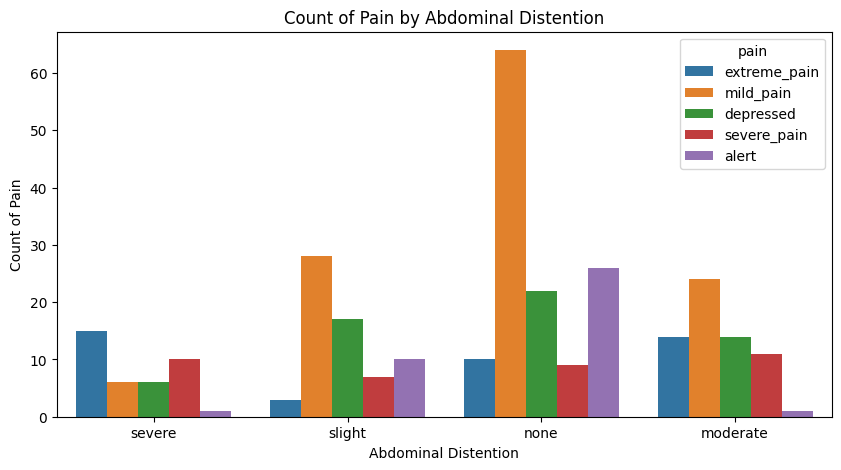

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='abdominal_distention', hue='pain', data=df1)
plt.xlabel('Abdominal Distention')
plt.ylabel('Count of Pain')
plt.title('Count of Pain by Abdominal Distention')
plt.show()

Q5) What pain is temperature of extremities associated with?

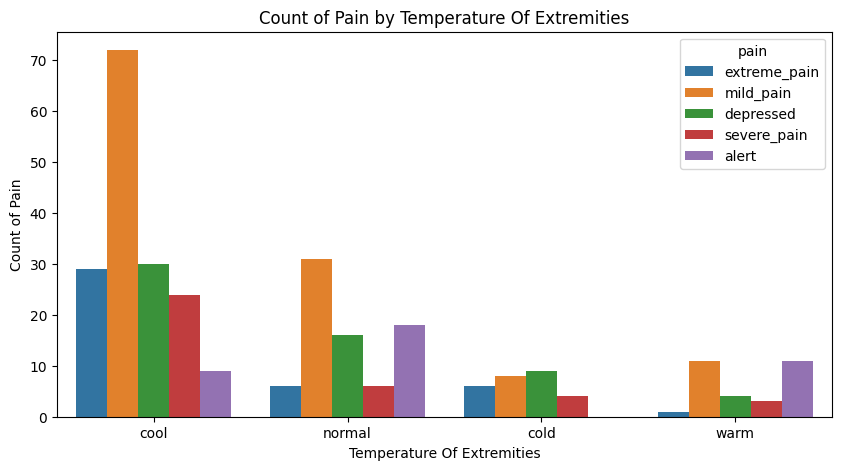

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='temp_of_extremities', hue='pain', data=df1)
plt.xlabel('Temperature Of Extremities')
plt.ylabel('Count of Pain')
plt.title('Count of Pain by Temperature Of Extremities')
plt.show()

Q6) Which peristalsis causes the most pain?

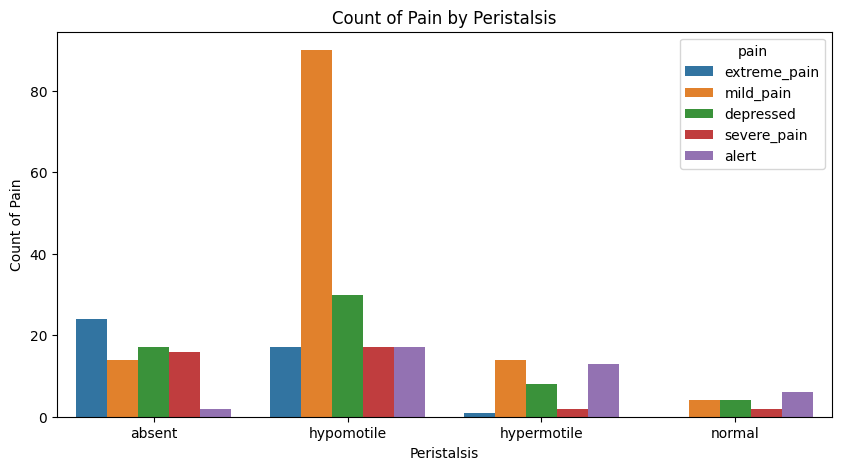

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='peristalsis', hue='pain', data=df1)
plt.xlabel('Peristalsis')
plt.ylabel('Count of Pain')
plt.title('Count of Pain by Peristalsis')
plt.show()

Q7) What pain is peripheral pulse associated with?

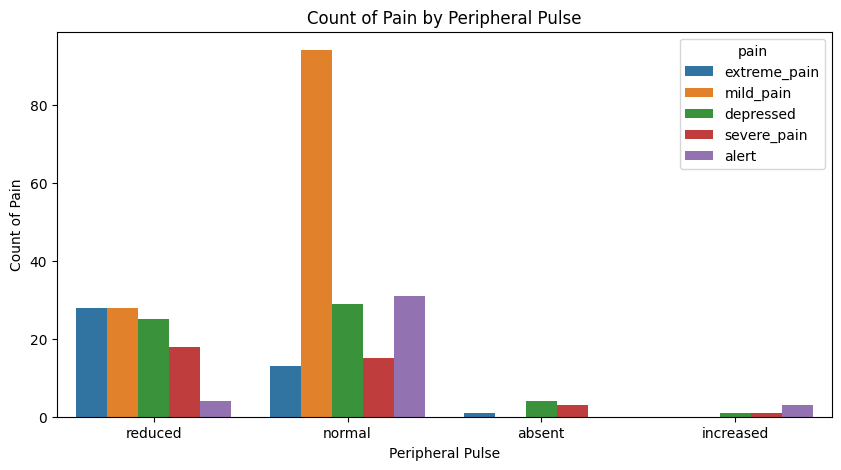

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='peripheral_pulse', hue='pain', data=df1)
plt.xlabel('Peripheral Pulse')
plt.ylabel('Count of Pain')
plt.title('Count of Pain by Peripheral Pulse')
plt.show()

Q8) Which pain has the highest rate of surgical damage?

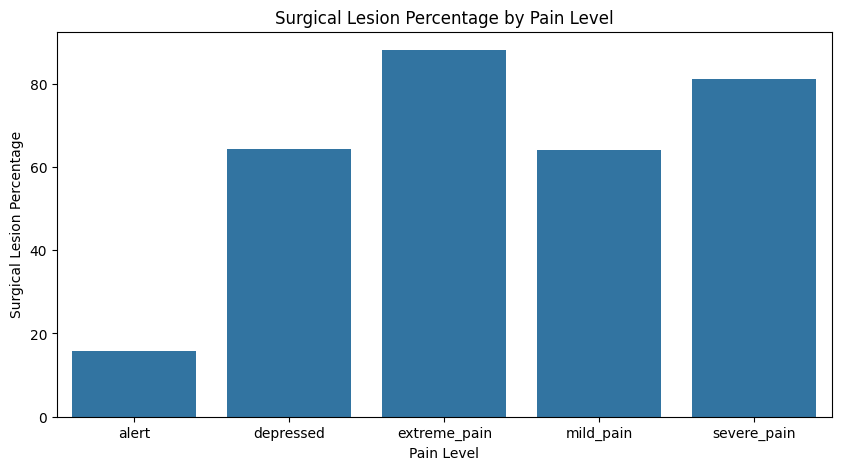

In [ ]:
df_surgical = df1[df1['surgical_lesion'] == 'yes']
group_by_pain = df_surgical.groupby('pain').size() / df1.groupby('pain').size() * 100
d5 = pd.DataFrame(group_by_pain).reset_index().rename(columns={0: 'surgical_lesion_percentage'})

plt.figure(figsize=(10, 5))
sns.barplot(x='pain', y='surgical_lesion_percentage', data=d5)
plt.xlabel('Pain Level')
plt.ylabel('Surgical Lesion Percentage')
plt.title('Surgical Lesion Percentage by Pain Level')
plt.show()


Q9) What pain is total protein associated with?

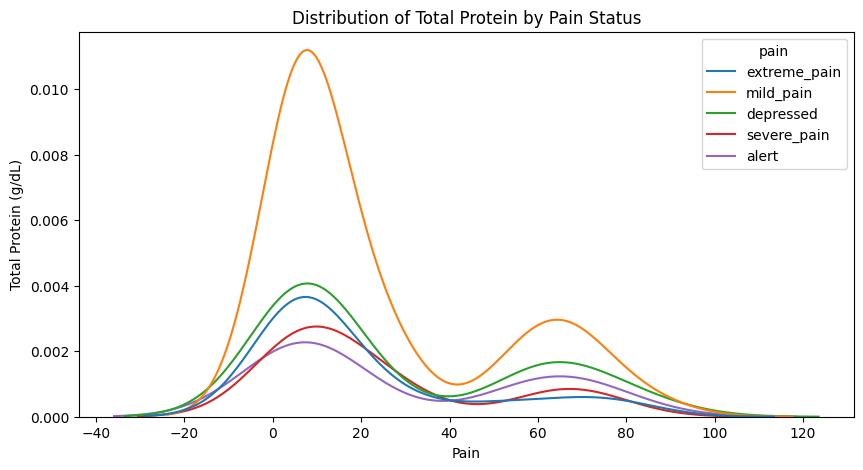

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(hue='pain', x='total_protein', data=df1)
plt.xlabel('Pain')
plt.ylabel('Total Protein (g/dL)')
plt.title('Distribution of Total Protein by Pain Status')
plt.show()


Q10) What pain is packed cell volume associated with?

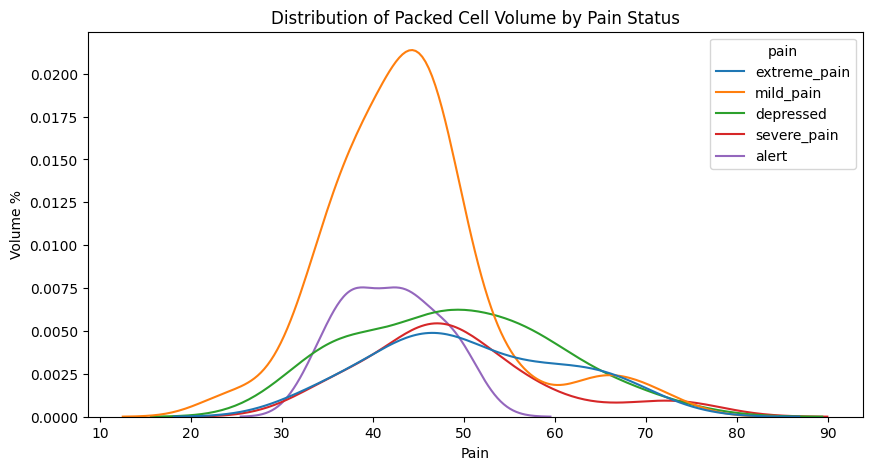

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(hue='pain', x='packed_cell_volume', data=df1)
plt.xlabel('Pain')
plt.ylabel('Volume %')
plt.title('Distribution of Packed Cell Volume by Pain Status')
plt.show()

Q11) What pain is mucous membrane associated with?

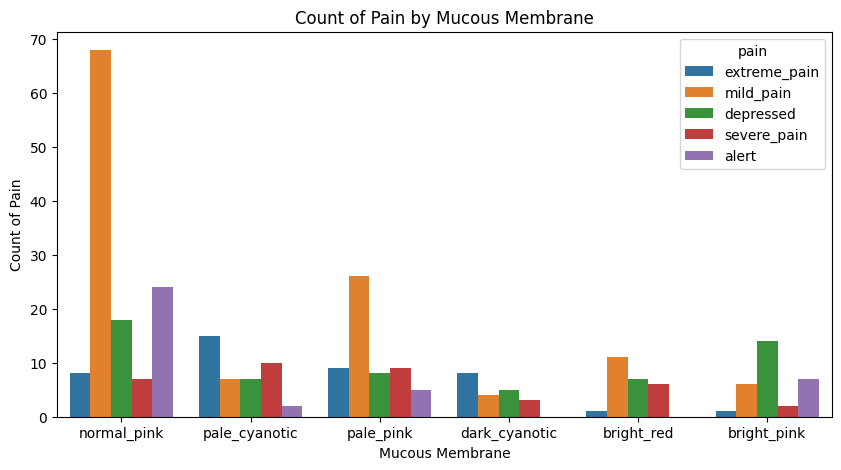

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='mucous_membrane', hue='pain', data=df1)
plt.xlabel('Mucous Membrane')
plt.ylabel('Count of Pain')
plt.title('Count of Pain by Mucous Membrane')
plt.show()

## <b> (3) Surgery wise Analysis </b>

Q1) Which pain is haved to perform surgery?

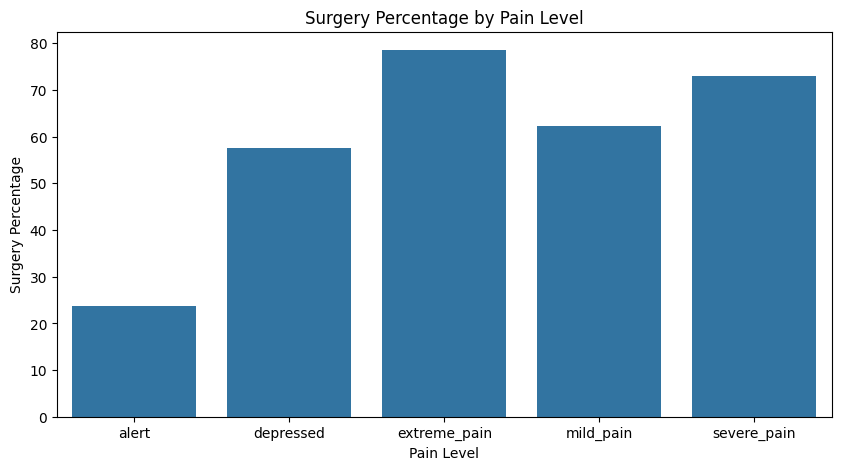

In [ ]:
df_surgical = df1[df1['surgery'] == 'yes']
group_by_pain = df_surgical.groupby('pain').size() / df1.groupby('pain').size() * 100
d1 = pd.DataFrame(group_by_pain).reset_index().rename(columns={0: 'surgery_percentage'})

plt.figure(figsize=(10, 5))
sns.barplot(x='pain', y='surgery_percentage', data=d1)
plt.xlabel('Pain Level')
plt.ylabel('Surgery Percentage')
plt.title('Surgery Percentage by Pain Level')
plt.show()


Q2) What rectal temperature is most suitable for surgery?

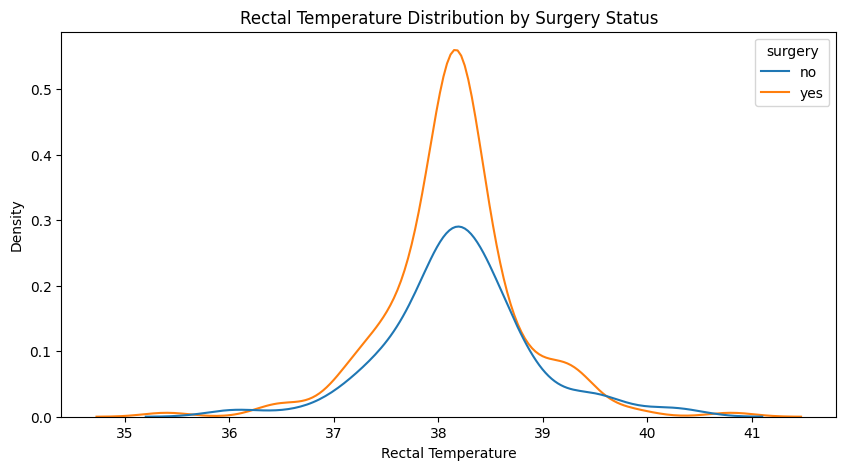

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df1, x='rectal_temp', hue='surgery')
plt.xlabel('Rectal Temperature')
plt.ylabel('Density')
plt.title('Rectal Temperature Distribution by Surgery Status')
plt.show()


Q3) Which peristalsis has a high surgical rate and surgical lesion rate?

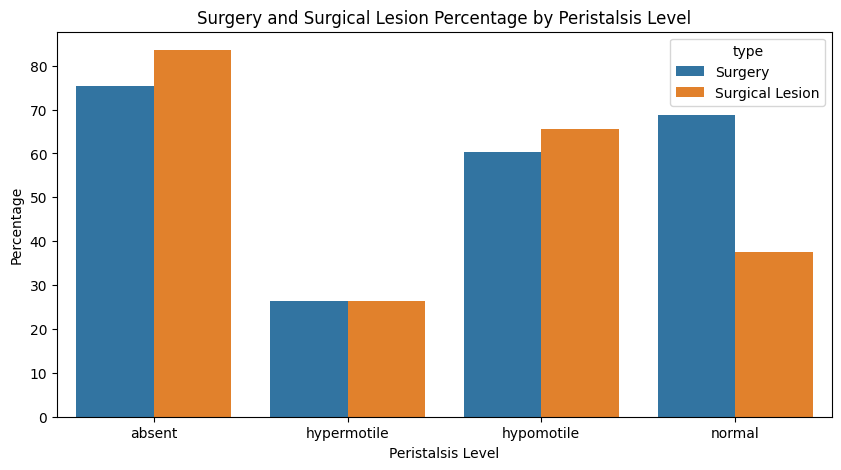

In [ ]:
df_surgery = df1[df1['surgery'] == 'yes']
group_by_peristalsis_surgery = df_surgery.groupby('peristalsis').size() / df1.groupby('peristalsis').size() * 100
d2 = pd.DataFrame(group_by_peristalsis_surgery).reset_index().rename(columns={0: 'percentage'})
d2['type'] = 'Surgery'

df_surgical_lesion = df1[df1['surgical_lesion'] == 'yes']
group_by_peristalsis_lesion = df_surgical_lesion.groupby('peristalsis').size() / df1.groupby('peristalsis').size() * 100
d3 = pd.DataFrame(group_by_peristalsis_lesion).reset_index().rename(columns={0: 'percentage'})
d3['type'] = 'Surgical Lesion'

combined_df = pd.concat([d2, d3])

plt.figure(figsize=(10, 5))
sns.barplot(x='peristalsis', y='percentage', hue='type', data=combined_df)
plt.xlabel('Peristalsis Level')
plt.ylabel('Percentage')
plt.title('Surgery and Surgical Lesion Percentage by Peristalsis Level')
plt.show()

Q4) Which abdominal distention has a high surgical rate and surgical lesion rate?

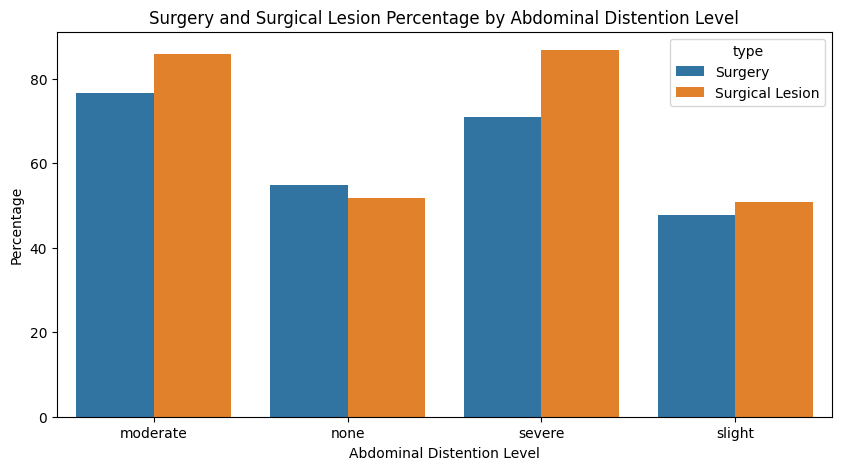

In [ ]:
df_surgery = df1[df1['surgery'] == 'yes']
group_by_abdominal_distention_surgery = df_surgery.groupby('abdominal_distention').size() / df1.groupby('abdominal_distention').size() * 100
d4 = pd.DataFrame(group_by_abdominal_distention_surgery).reset_index().rename(columns={0: 'percentage'})
d4['type'] = 'Surgery'

df_surgical_lesion = df1[df1['surgical_lesion'] == 'yes']
group_by_abdominal_distention_lesion = df_surgical_lesion.groupby('abdominal_distention').size() / df1.groupby('abdominal_distention').size() * 100
d5 = pd.DataFrame(group_by_abdominal_distention_lesion).reset_index().rename(columns={0: 'percentage'})
d5['type'] = 'Surgical Lesion'

combined_df = pd.concat([d4, d5])

plt.figure(figsize=(10, 5))
sns.barplot(x='abdominal_distention', y='percentage', hue='type', data=combined_df)
plt.xlabel('Abdominal Distention Level')
plt.ylabel('Percentage')
plt.title('Surgery and Surgical Lesion Percentage by Abdominal Distention Level')
plt.show()


Q5) Which rectal feces has a high surgical rate and surgical lesion rate?

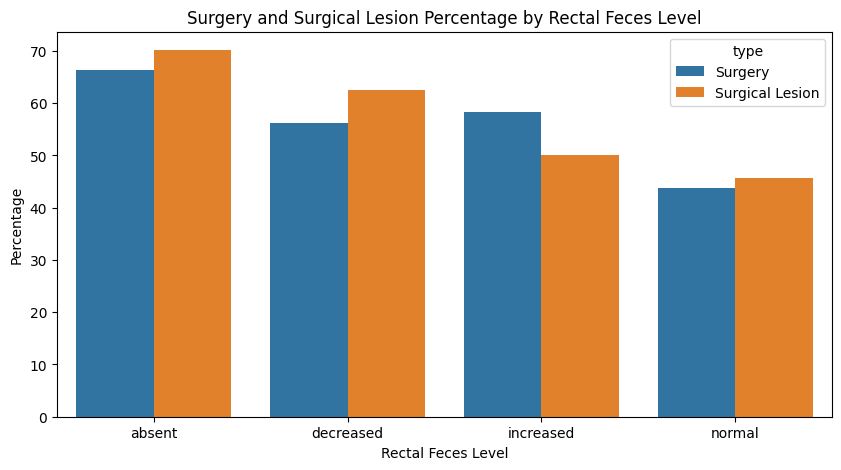

In [ ]:
df_surgery = df1[df1['surgery'] == 'yes']
group_by_rectal_exam_feces_surgery = df_surgery.groupby('rectal_exam_feces').size() / df1.groupby('rectal_exam_feces').size() * 100
d6 = pd.DataFrame(group_by_rectal_exam_feces_surgery).reset_index().rename(columns={0: 'percentage'})
d6['type'] = 'Surgery'

df_surgical_lesion = df1[df1['surgical_lesion'] == 'yes']
group_by_rectal_exam_feces_lesion = df_surgical_lesion.groupby('rectal_exam_feces').size() / df1.groupby('rectal_exam_feces').size() * 100
d7 = pd.DataFrame(group_by_rectal_exam_feces_lesion).reset_index().rename(columns={0: 'percentage'})
d7['type'] = 'Surgical Lesion'

combined_df = pd.concat([d6, d7])

plt.figure(figsize=(10, 5))
sns.barplot(x='rectal_exam_feces', y='percentage', hue='type', data=combined_df)
plt.xlabel('Rectal Feces Level')
plt.ylabel('Percentage')
plt.title('Surgery and Surgical Lesion Percentage by Rectal Feces Level')
plt.show()

Q6) Which nasogastric tube has a high surgical rate and surgical lesion rate?

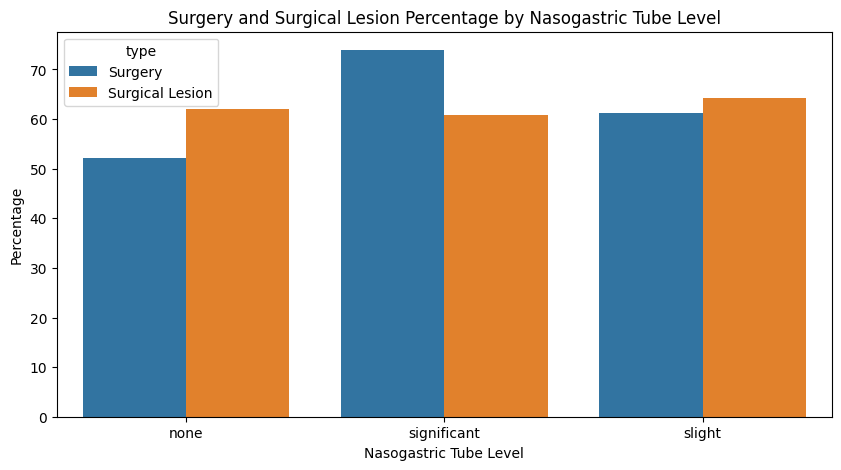

In [ ]:
df_surgery = df1[df1['surgery'] == 'yes']
group_by_nasogastric_tube_surgery = df_surgery.groupby('nasogastric_tube').size() / df1.groupby('nasogastric_tube').size() * 100
d8 = pd.DataFrame(group_by_nasogastric_tube_surgery).reset_index().rename(columns={0: 'percentage'})
d8['type'] = 'Surgery'

df_surgical_lesion = df1[df1['surgical_lesion'] == 'yes']
group_by_nasogastric_tube_lesion = df_surgical_lesion.groupby('nasogastric_tube').size() / df1.groupby('nasogastric_tube').size() * 100
d9 = pd.DataFrame(group_by_nasogastric_tube_lesion).reset_index().rename(columns={0: 'percentage'})
d9['type'] = 'Surgical Lesion'

combined_df = pd.concat([d8, d9])

plt.figure(figsize=(10, 5))
sns.barplot(x='nasogastric_tube', y='percentage', hue='type', data=combined_df)
plt.xlabel('Nasogastric Tube Level')
plt.ylabel('Percentage')
plt.title('Surgery and Surgical Lesion Percentage by Nasogastric Tube Level')
plt.show()

Q7) Which mucous membrane has a high surgical rate and surgical lesion rate?

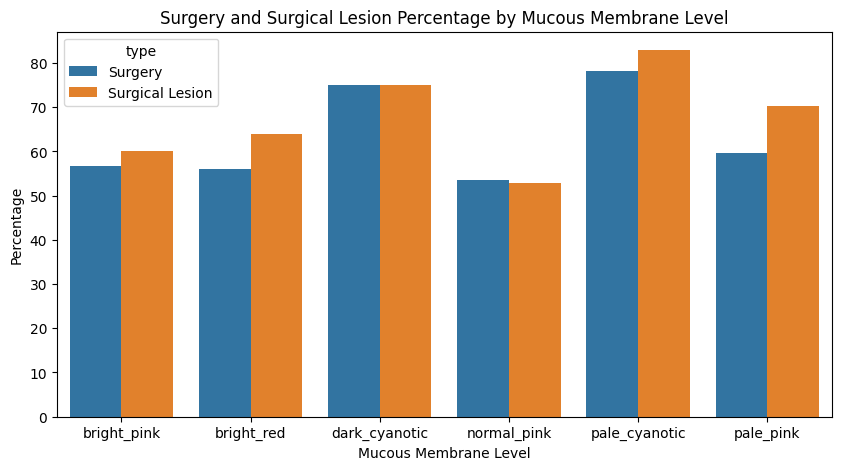

In [ ]:
df_surgery = df1[df1['surgery'] == 'yes']
group_by_mucous_membrane_surgery = df_surgery.groupby('mucous_membrane').size() / df1.groupby('mucous_membrane').size() * 100
d10 = pd.DataFrame(group_by_mucous_membrane_surgery).reset_index().rename(columns={0: 'percentage'})
d10['type'] = 'Surgery'

df_surgical_lesion = df1[df1['surgical_lesion'] == 'yes']
group_by_mucous_membrane_lesion = df_surgical_lesion.groupby('mucous_membrane').size() / df1.groupby('mucous_membrane').size() * 100
d11 = pd.DataFrame(group_by_mucous_membrane_lesion).reset_index().rename(columns={0: 'percentage'})
d11['type'] = 'Surgical Lesion'

combined_df = pd.concat([d10, d11])

plt.figure(figsize=(10, 5))
sns.barplot(x='mucous_membrane', y='percentage', hue='type', data=combined_df)
plt.xlabel('Mucous Membrane Level')
plt.ylabel('Percentage')
plt.title('Surgery and Surgical Lesion Percentage by Mucous Membrane Level')
plt.show()

Q8) Which outcome has a high surgical rate and surgical lesion rate?

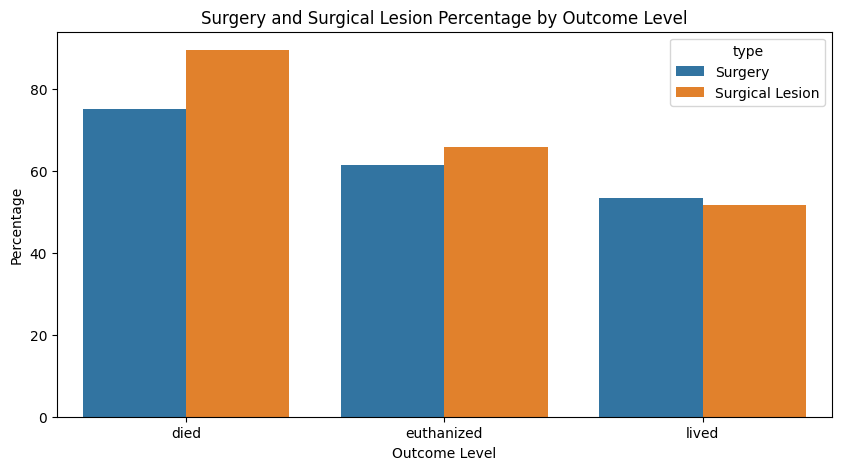

In [ ]:
df_surgery = df1[df1['surgery'] == 'yes']
group_by_outcome_surgery = df_surgery.groupby('outcome').size() / df1.groupby('outcome').size() * 100
d12 = pd.DataFrame(group_by_outcome_surgery).reset_index().rename(columns={0: 'percentage'})
d12['type'] = 'Surgery'

df_surgical_lesion = df1[df1['surgical_lesion'] == 'yes']
group_by_outcome_lesion = df_surgical_lesion.groupby('outcome').size() / df1.groupby('outcome').size() * 100
d13 = pd.DataFrame(group_by_outcome_lesion).reset_index().rename(columns={0: 'percentage'})
d13['type'] = 'Surgical Lesion'

combined_df = pd.concat([d12, d13])

plt.figure(figsize=(10, 5))
sns.barplot(x='outcome', y='percentage', hue='type', data=combined_df)
plt.xlabel('Outcome Level')
plt.ylabel('Percentage')
plt.title('Surgery and Surgical Lesion Percentage by Outcome Level')
plt.show()

**1.   Preprocess**

In [ ]:
# Seed for result reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns!='outcome'], df['outcome'], test_size=0.3, random_state=seed,stratify=df['outcome'])

The variable 'lesion_1' consists of four codes. This variable will be splited into four columns.

In [ ]:
# Data Cleaning
drop_cols = ['lesion_1', 'lesion_2', 'lesion_3', 'hospital_number', 'nasogastric_reflux_ph', 'abdomo_appearance', 'abdomo_protein']


def drop_columns(df: pd.DataFrame):
    return df.drop(columns=drop_cols)


drop_transformer = FunctionTransformer(func=drop_columns)

In [ ]:
# Split 'lesion_1' to four columns
new_cols = ['lesion_site', 'lesion_type', 'lesion_subtype', 'lesion_code']


def split_lesion(df: pd.DataFrame):
    df = pd.concat([df, pd.DataFrame(columns=new_cols)])
    for i, v in df['lesion_1'].items():
        if v == 0:
            df.loc[i, new_cols] = ['-1', '-1', '-1', '-1']
        else:
            m = re.search('(11|00|[1-9])([1-4])([0-2])(10|[0-9])', str(v))
            if m is not None:
                df.loc[i, new_cols] = [m.group(1), m.group(2), m.group(3), m.group(4)]
    return df


split_transformer = FunctionTransformer(func=split_lesion)

In [ ]:
# Data Normalization
# z-score normalization for numerical columns
def zscore(df: pd.DataFrame):
    return stats.zscore(df)


zscore_transformer = FunctionTransformer(func=zscore)

In [ ]:
# Handling Missing Values
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
extra_tree_imputer = IterativeImputer(ExtraTreesRegressor())


# Round the categorical data after handling missing data.
def round(df: pd.DataFrame):
    return np.round(df)


round_transformer = FunctionTransformer(func=round)

In [ ]:
# One hot enconding to categorical variables
one_hot_enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

# Define categorical and numerical columns
## Categorical columns
cats = [c for c in X_train.select_dtypes(include='object').columns if c not in drop_cols] + new_cols
## Numerical columns
nums = [c for c in X_train.select_dtypes(exclude='object').columns if c not in drop_cols]

# Pipeline for categorical variables
categorical_pipe = make_pipeline(encoder, extra_tree_imputer, round_transformer, one_hot_enc)

# Pipeline for numerical variables
numerical_pipe = make_pipeline(extra_tree_imputer, zscore_transformer)

# Apply pipelines
transformers = ColumnTransformer(
    transformers=[
        ("categorical", categorical_pipe, cats),
        ('numerical', numerical_pipe, nums)
    ], verbose_feature_names_out=False
)

In [ ]:
# Create the main pipeline
pipeline = Pipeline([
    ("split", split_transformer),
    ("drop", drop_transformer),
    ('preprocessing', transformers)
])

# Apply the pipeline to the training data
X_train_transformed = pipeline.fit_transform(X_train)

# Apply the pipeline to the test data
X_test_transformed = pipeline.transform(X_test)

# Print to check if there are any null values left
print("null values X_train = {}".format(np.isnan(X_train_transformed).sum().sum()))
print("null values X_test = {}".format(np.isnan(X_test_transformed).sum().sum()))

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


null values X_train = 0
null values X_test = 0


In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [ ]:
# Tạo danh sách các mô hình phân loại
basic_models = {
    'kNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
    'MLP': MLPClassifier(max_iter=1000),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

In [ ]:
# Huấn luyện và đánh giá các mô hình phân loại không điều chỉnh tham số
results_basic = []
training_times_basic = {}

for name, clf in basic_models.items():
    start_time = time.time()
    scores = cross_val_score(clf, X_train_transformed, y_train, cv=5, scoring='accuracy')
    clf.fit(X_train_transformed, y_train)
    y_pred = clf.predict(X_test_transformed)
    y_prob = clf.predict_proba(X_test_transformed) if hasattr(clf, 'predict_proba') else None
    end_time = time.time()
    training_time = end_time - start_time

    results_basic.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, average='weighted', zero_division=0),
        'AUC': roc_auc_score(y_test, y_prob, multi_class='ovr') if y_prob is not None else 'N/A',
        'Training Time': training_time
    })
    training_times_basic[name] = training_time

# Tạo DataFrame từ kết quả của các mô hình basic
results_basic_df = pd.DataFrame(results_basic).set_index('Model')

print("Kết quả không điều chỉnh tham số:")
print(results_basic_df)

Kết quả không điều chỉnh tham số:
                     Accuracy  Precision    Recall  F1 Score       AUC  \
Model                                                                    
kNN                  0.744444   0.747909  0.744444  0.724270  0.805386   
Naive Bayes          0.622222   0.751990  0.622222  0.626564  0.784656   
SVM                  0.700000   0.726840  0.700000  0.673561  0.868186   
Decision Tree        0.677778   0.681595  0.677778  0.673475  0.699357   
Random Forest        0.700000   0.727778  0.700000  0.675636  0.839496   
AdaBoost             0.666667   0.655596  0.666667  0.658897  0.752872   
Gradient Boosting    0.755556   0.747102  0.755556  0.746602  0.849653   
LDA                  0.722222   0.737127  0.722222  0.727352  0.848309   
MLP                  0.755556   0.753199  0.755556  0.753667  0.838376   
Logistic Regression  0.733333   0.718455  0.733333  0.721879  0.864795   

                     Training Time  
Model                               
kNN

In [ ]:
# Định nghĩa các mô hình và tham số
models = {
    'kNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'model__n_neighbors': [3, 5, 7, 9],
            'model__weights': ['uniform', 'distance']
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {
            'model__C': [0.1, 1, 10],
            'model__gamma': [1, 0.1, 0.01],
            'model__kernel': ['rbf', 'poly', 'linear']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators': [10, 50, 100],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'model__n_estimators': [50, 100, 150],
            'model__learning_rate': [0.01, 0.1, 1]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'model__n_estimators': [50, 100, 150],
            'model__learning_rate': [0.01, 0.1, 1],
            'model__max_depth': [3, 5, 7]
        }
    },
    'LDA': {
        'model': LinearDiscriminantAnalysis(),
        'params': {
            'model__solver': ['lsqr', 'eigen'],
            'model__shrinkage': ['auto']
        }
    },
    'MLP': {
        'model': MLPClassifier(max_iter=2000),
        'params': {
            'model__hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'model__activation': ['relu', 'tanh'],
            'model__solver': ['adam', 'sgd'],
            'model__learning_rate': ['constant', 'adaptive'],
            'model__learning_rate_init': [0.001, 0.01, 0.1]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'model__C': [0.1, 1, 10],
            'model__penalty': ['l1', 'l2'],
            'model__solver': ['liblinear']
        }
    }
}

In [ ]:
# Function to perform hyperparameter tuning with cross-validation
def tune_model_with_cv(model, params, X_train_transformed, y_train):
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    try:
        grid_search = GridSearchCV(pipe, param_grid=params, cv=10, n_jobs=-1, scoring='accuracy')
        start_time = time.time()
        grid_search.fit(X_train_transformed, y_train)
        end_time = time.time()
        training_time = end_time - start_time
        return grid_search.best_estimator_, training_time
    except Exception as e:
        print(f"Lỗi khi huấn luyện mô hình {model}: {e}")
        return None, 0

# Function to evaluate models with cross-validation
def evaluate_models_with_cv(X_train_transformed, y_train, X_test_transformed, y_test):
    results = []
    tuned_models = {}
    for model_name, model_dict in models.items():
        model = model_dict['model']
        params = model_dict['params']
        best_model, training_time = tune_model_with_cv(model, params, X_train_transformed, y_train)
        if best_model is None:
            continue
        tuned_models[model_name] = best_model
        y_pred = best_model.predict(X_test_transformed)

        if len(np.unique(y_test)) > 2:
            auc = roc_auc_score(y_test, best_model.predict_proba(X_test_transformed), multi_class='ovr')
        else:
            auc = roc_auc_score(y_test, best_model.predict_proba(X_test_transformed)[:, 1])

        results.append({
            'Model': model_name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
            'F1 Score': f1_score(y_test, y_pred, average='weighted', zero_division=0),
            'AUC': auc,
            'Training Time': training_time
        })
    return results, tuned_models

# Evaluate models with cross-validation
results_with_cv, tuned_models = evaluate_models_with_cv(X_train_transformed, y_train, X_test_transformed, y_test)

In [ ]:
# Evaluate models with Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_transformed)
X_test_poly = poly.transform(X_test_transformed)
results_poly, tuned_models_poly = evaluate_models_with_cv(X_train_poly, y_train, X_test_poly, y_test)


In [ ]:
# Evaluate models with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_transformed, y_train)
results_smote, tuned_models_smote = evaluate_models_with_cv(X_train_smote, y_train_smote, X_test_transformed, y_test)


In [ ]:
# Evaluate ensemble methods using the tuned models
def evaluate_ensemble_methods(X_train_transformed, y_train, X_test_transformed, y_test, tuned_models):
    ensemble_results = []

    # Voting Classifier
    voting_clf = VotingClassifier(estimators=[
        (name, model.named_steps['model']) for name, model in tuned_models.items()
    ], voting='soft')

    start_time = time.time()
    voting_clf.fit(X_train_transformed, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    y_pred_voting = voting_clf.predict(X_test_transformed)

    # Handle multi-class classification for AUC
    if len(np.unique(y_test)) > 2:
        auc_voting = roc_auc_score(y_test, voting_clf.predict_proba(X_test_transformed), multi_class='ovr')
    else:
        auc_voting = roc_auc_score(y_test, voting_clf.predict_proba(X_test_transformed)[:, 1])

    ensemble_results.append({
        'Model': 'Voting Classifier',
        'Accuracy': accuracy_score(y_test, y_pred_voting),
        'Precision': precision_score(y_test, y_pred_voting, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred_voting, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_test, y_pred_voting, average='weighted', zero_division=0),
        'AUC': auc_voting,
        'Training Time': training_time
    })

    # Bagging Classifier (using Decision Tree)
    bagging_clf = BaggingClassifier(base_estimator=tuned_models['Decision Tree'].named_steps['model'], n_estimators=100, random_state=42)
    start_time = time.time()
    bagging_clf.fit(X_train_transformed, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    y_pred_bagging = bagging_clf.predict(X_test_transformed)

    # Handle multi-class classification for AUC
    if len(np.unique(y_test)) > 2:
        auc_bagging = roc_auc_score(y_test, bagging_clf.predict_proba(X_test_transformed), multi_class='ovr')
    else:
        auc_bagging = roc_auc_score(y_test, bagging_clf.predict_proba(X_test_transformed)[:, 1])

    ensemble_results.append({
        'Model': 'Bagging Classifier',
        'Accuracy': accuracy_score(y_test, y_pred_bagging),
        'Precision': precision_score(y_test, y_pred_bagging, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred_bagging, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_test, y_pred_bagging, average='weighted', zero_division=0),
        'AUC': auc_bagging,
        'Training Time': training_time
    })

    # Stacking Classifier
    stacking_clf = StackingClassifier(estimators=[
        (name, model.named_steps['model']) for name, model in tuned_models.items()
    ], final_estimator=LogisticRegression())

    start_time = time.time()
    stacking_clf.fit(X_train_transformed, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    y_pred_stacking = stacking_clf.predict(X_test_transformed)

    # Handle multi-class classification for AUC
    if len(np.unique(y_test)) > 2:
        auc_stacking = roc_auc_score(y_test, stacking_clf.predict_proba(X_test_transformed), multi_class='ovr')
    else:
        auc_stacking = roc_auc_score(y_test, stacking_clf.predict_proba(X_test_transformed)[:, 1])

    ensemble_results.append({
        'Model': 'Stacking Classifier',
        'Accuracy': accuracy_score(y_test, y_pred_stacking),
        'Precision': precision_score(y_test, y_pred_stacking, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred_stacking, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_test, y_pred_stacking, average='weighted', zero_division=0),
        'AUC': auc_stacking,
        'Training Time': training_time
    })

    return ensemble_results

# Evaluate ensemble methods on original data
results_ensemble = evaluate_ensemble_methods(X_train_transformed, y_train, X_test_transformed, y_test, tuned_models)

# Evaluate ensemble methods for Polynomial Features
results_ensemble_poly = evaluate_ensemble_methods(X_train_poly, y_train, X_test_poly, y_test, tuned_models_poly)

# Evaluate ensemble methods for SMOTE
results_ensemble_smote = evaluate_ensemble_methods(X_train_smote, y_train_smote, X_test_transformed, y_test, tuned_models_smote)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stocha

In [ ]:
from tabulate import tabulate

# Define a function to print each DataFrame with tabulate
def print_table(df, method_name):
    print(f"Results for {method_name}")
    print(tabulate(df, headers='keys', tablefmt='psql'))
    print("\n" + "="*80 + "\n")

# Print each table individually
print_table(pd.DataFrame(results_basic), "Basic Models")
print_table(pd.DataFrame(results_with_cv), "Cross-Validation")
print_table(pd.DataFrame(results_poly), "Polynomial Features")
print_table(pd.DataFrame(results_smote), "SMOTE")
print_table(pd.DataFrame(results_ensemble), "Ensemble Methods")
print_table(pd.DataFrame(results_ensemble_poly), "Ensemble Methods with Polynomial Features")
print_table(pd.DataFrame(results_ensemble_smote), "Ensemble Methods with SMOTE")


Results for Basic Models
+----+---------------------+------------+-------------+----------+------------+----------+-----------------+
|    | Model               |   Accuracy |   Precision |   Recall |   F1 Score |      AUC |   Training Time |
|----+---------------------+------------+-------------+----------+------------+----------+-----------------|
|  0 | kNN                 |   0.744444 |    0.747909 | 0.744444 |   0.72427  | 0.805386 |       0.250212  |
|  1 | Naive Bayes         |   0.622222 |    0.75199  | 0.622222 |   0.626564 | 0.784656 |       0.0425119 |
|  2 | SVM                 |   0.7      |    0.72684  | 0.7      |   0.673561 | 0.868186 |       0.167599  |
|  3 | Decision Tree       |   0.677778 |    0.681595 | 0.677778 |   0.673475 | 0.699357 |       0.0288835 |
|  4 | Random Forest       |   0.7      |    0.727778 | 0.7      |   0.675636 | 0.839496 |       1.30291   |
|  5 | AdaBoost            |   0.666667 |    0.655596 | 0.666667 |   0.658897 | 0.752872 |       0.5944

In [ ]:
# Combine all results using pd.concat
results_combined = pd.concat([
    pd.DataFrame(results_basic).assign(Method='Basic Models'),
    pd.DataFrame(results_with_cv).assign(Method='Cross-Validation'),
    pd.DataFrame(results_poly).assign(Method='Polynomial Features'),
    pd.DataFrame(results_smote).assign(Method='SMOTE'),
    pd.DataFrame(results_ensemble).assign(Method='Ensemble Methods'),
    pd.DataFrame(results_ensemble_poly).assign(Method='Ensemble Methods with Polynomial Features'),
    pd.DataFrame(results_ensemble_smote).assign(Method='Ensemble Methods with SMOTE')
], ignore_index=True)

print(results_combined)

                  Model  Accuracy  Precision    Recall  F1 Score       AUC  \
0                   kNN  0.744444   0.747909  0.744444  0.724270  0.805386   
1           Naive Bayes  0.622222   0.751990  0.622222  0.626564  0.784656   
2                   SVM  0.700000   0.726840  0.700000  0.673561  0.868186   
3         Decision Tree  0.677778   0.681595  0.677778  0.673475  0.699357   
4         Random Forest  0.700000   0.727778  0.700000  0.675636  0.839496   
5              AdaBoost  0.666667   0.655596  0.666667  0.658897  0.752872   
6     Gradient Boosting  0.755556   0.747102  0.755556  0.746602  0.849653   
7                   LDA  0.722222   0.737127  0.722222  0.727352  0.848309   
8                   MLP  0.755556   0.753199  0.755556  0.753667  0.838376   
9   Logistic Regression  0.733333   0.718455  0.733333  0.721879  0.864795   
10                  kNN  0.733333   0.764011  0.733333  0.711499  0.793076   
11          Naive Bayes  0.488889   0.705883  0.488889  0.477046

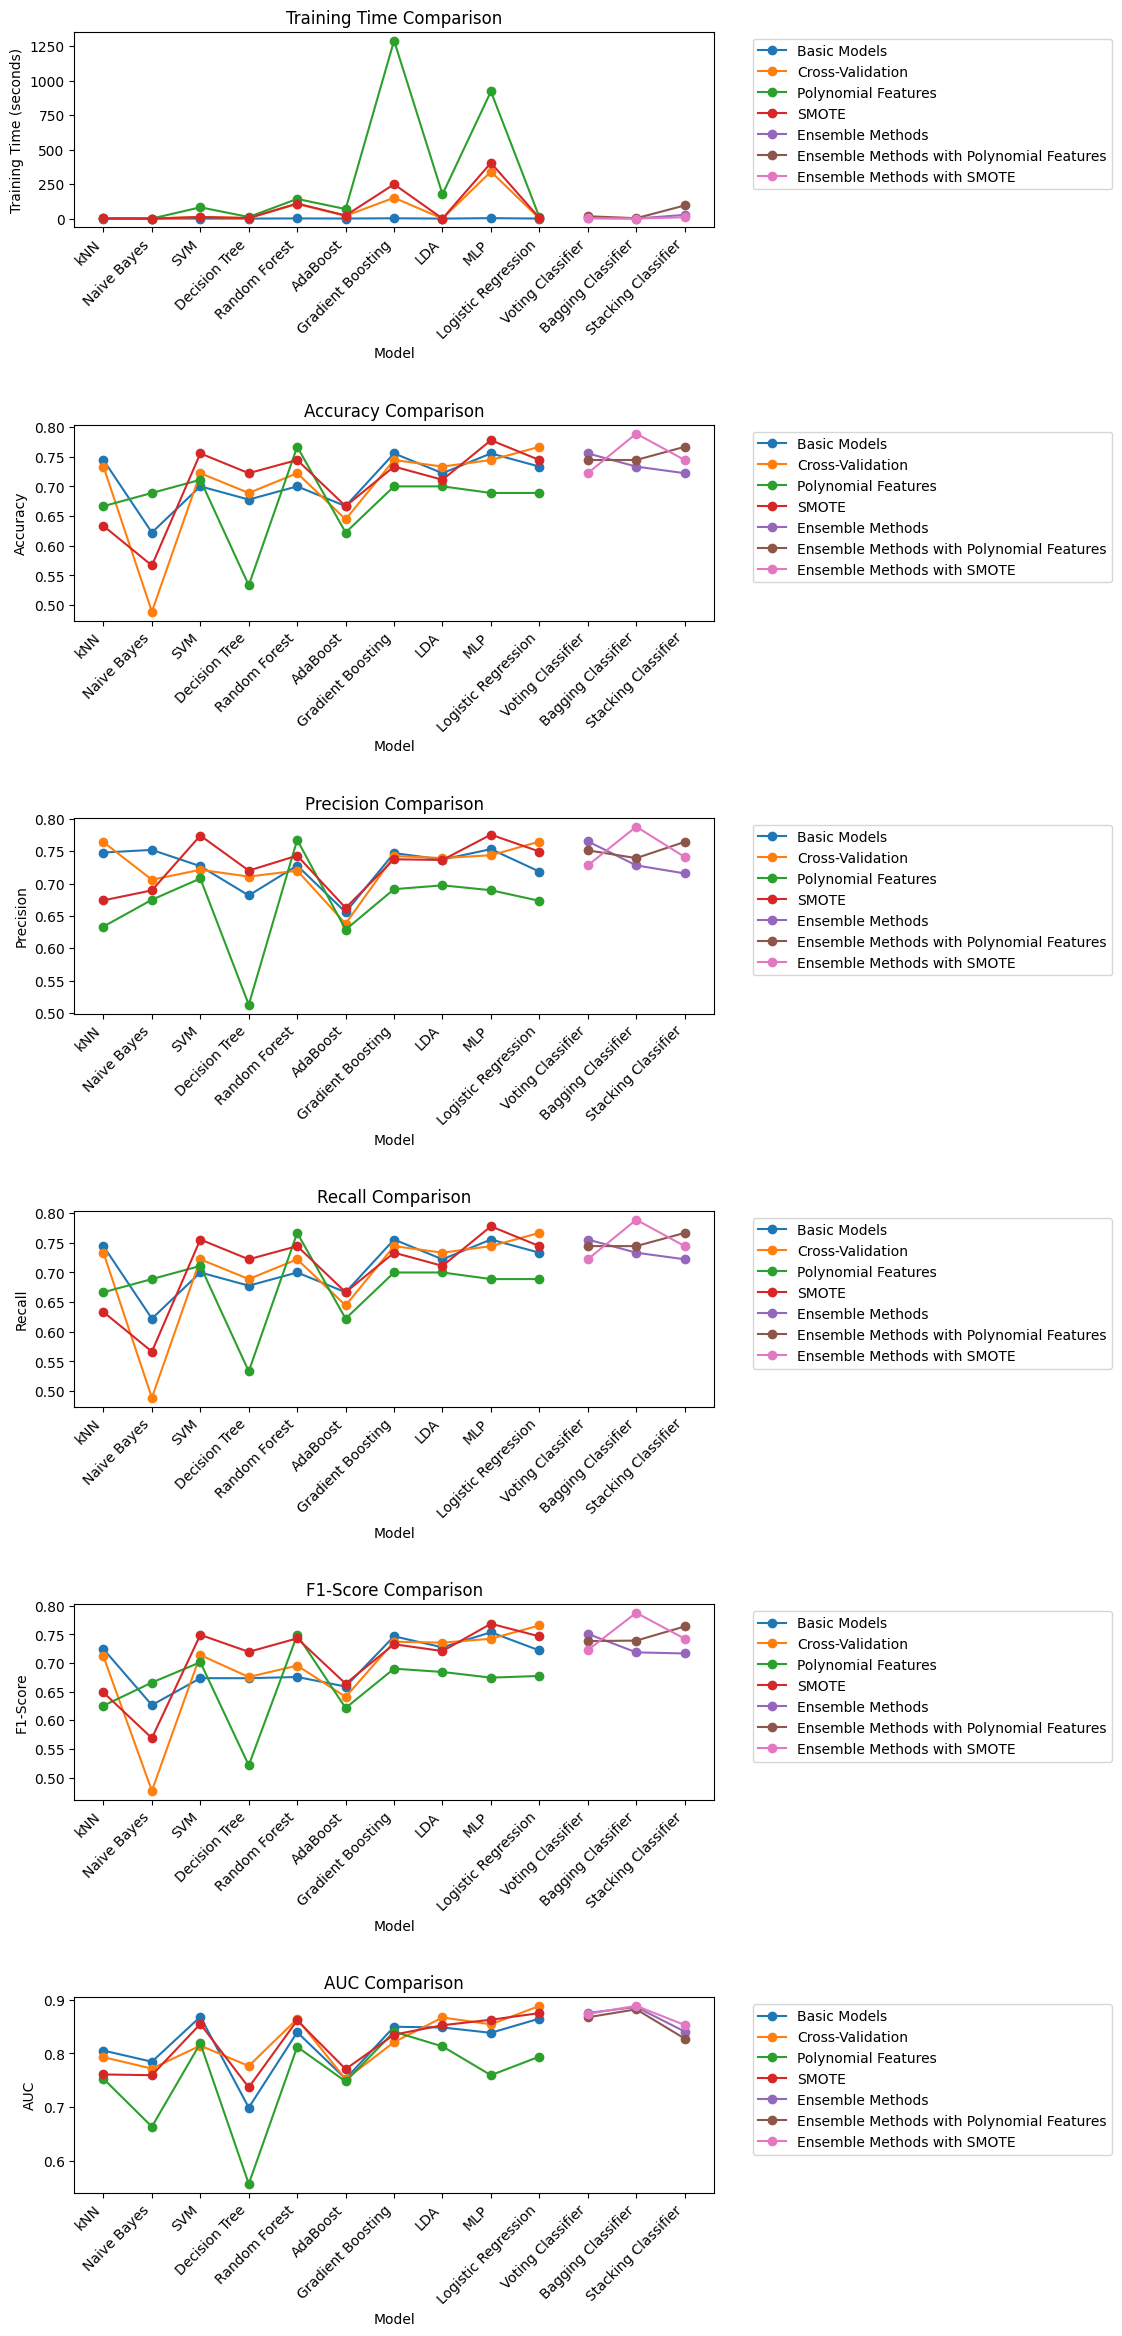

In [ ]:
# Plotting
plt.figure(figsize=(12, 24))

# Training Time
plt.subplot(6, 1, 1)
for method in results_combined['Method'].unique():
    subset = results_combined[results_combined['Method'] == method]
    plt.plot(subset['Model'], subset['Training Time'], label=method, marker='o')
plt.title('Training Time Comparison')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Accuracy
plt.subplot(6, 1, 2)
for method in results_combined['Method'].unique():
    subset = results_combined[results_combined['Method'] == method]
    plt.plot(subset['Model'], subset['Accuracy'], label=method, marker='o')
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Precision
plt.subplot(6, 1, 3)
for method in results_combined['Method'].unique():
    subset = results_combined[results_combined['Method'] == method]
    plt.plot(subset['Model'], subset['Precision'], label=method, marker='o')
plt.title('Precision Comparison')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Recall
plt.subplot(6, 1, 4)
for method in results_combined['Method'].unique():
    subset = results_combined[results_combined['Method'] == method]
    plt.plot(subset['Model'], subset['Recall'], label=method, marker='o')
plt.title('Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# F1-Score
plt.subplot(6, 1, 5)
for method in results_combined['Method'].unique():
    subset = results_combined[results_combined['Method'] == method]
    plt.plot(subset['Model'], subset['F1 Score'], label=method, marker='o')
plt.title('F1-Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# AUC
plt.subplot(6, 1, 6)
for method in results_combined['Method'].unique():
    subset = results_combined[results_combined['Method'] == method]
    plt.plot(subset['Model'], subset['AUC'], label=method, marker='o')
plt.title('AUC Comparison')
plt.xlabel('Model')
plt.ylabel('AUC')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(pad=3.0)  # Adjust padding for better spacing between plots
plt.show()